<a href="https://colab.research.google.com/github/Ahalya003/TEST/blob/main/cnn_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from zipfile import ZipFile
import PIL
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = pathlib.Path("/content/drive/MyDrive/RD data/Training")
test_dir = pathlib.Path("/content/drive/MyDrive/RD data/Test")

In [ ]:
image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

749

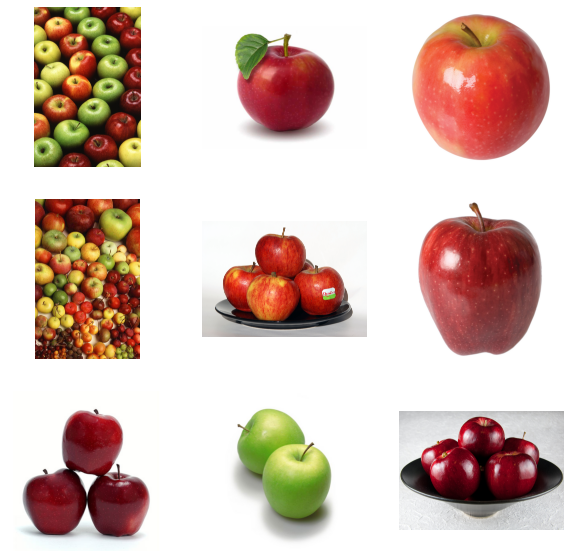

In [ ]:
fruits = list(train_dir.glob("apples/*.jpg"))
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
batch_size = 128
img_height = 100
img_width = 100

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 749 files belonging to 29 classes.
Using 600 files for training.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 749 files belonging to 29 classes.
Using 149 files for validation.


In [ ]:
class_names = train_data.class_names
num_classes = len(class_names)

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size = 32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size = 32, 
    class_mode='categorical' 
)

Found 749 images belonging to 29 classes.
Found 267 images belonging to 29 classes.


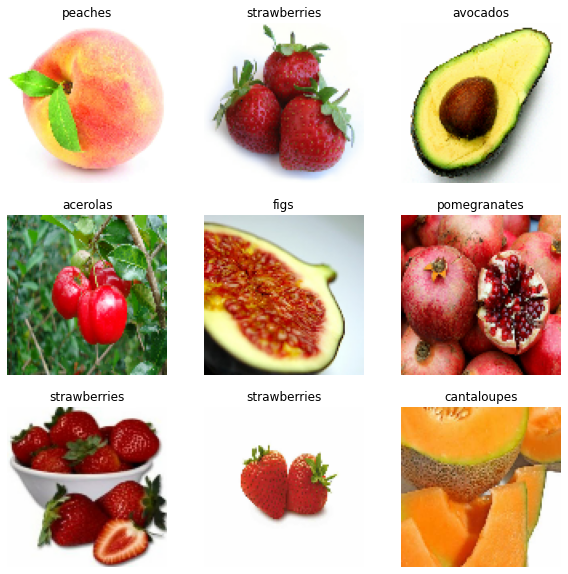

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),

    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
     keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
  train_generator,
  steps_per_epoch=18,  
  validation_steps=4,
  validation_data=test_generator,
  epochs=45,
  verbose=1
)

Epoch 1/45
18/18 [==============================] - 106s 6s/step - loss: 3.3761 - accuracy: 0.0413 - val_loss: 3.3199 - val_accuracy: 0.0625
Epoch 2/45
18/18 [==============================] - 49s 3s/step - loss: 3.2247 - accuracy: 0.1024 - val_loss: 3.1303 - val_accuracy: 0.0859
Epoch 3/45
18/18 [==============================] - 35s 2s/step - loss: 2.9938 - accuracy: 0.1418 - val_loss: 2.7117 - val_accuracy: 0.1953
Epoch 4/45
18/18 [==============================] - 29s 2s/step - loss: 2.4851 - accuracy: 0.2783 - val_loss: 2.1985 - val_accuracy: 0.3438
Epoch 5/45
18/18 [==============================] - 29s 2s/step - loss: 2.1417 - accuracy: 0.3576 - val_loss: 1.9670 - val_accuracy: 0.4062
Epoch 6/45
18/18 [==============================] - 29s 2s/step - loss: 1.8464 - accuracy: 0.4111 - val_loss: 1.8988 - val_accuracy: 0.4062
Epoch 7/45
18/18 [==============================] - 28s 2s/step - loss: 1.6314 - accuracy: 0.4826 - val_loss: 1.5224 - val_accuracy: 0.4609
Epoch 8/45
18/18 [=

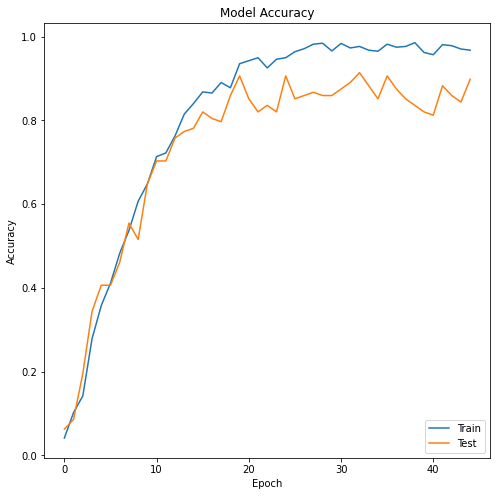

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

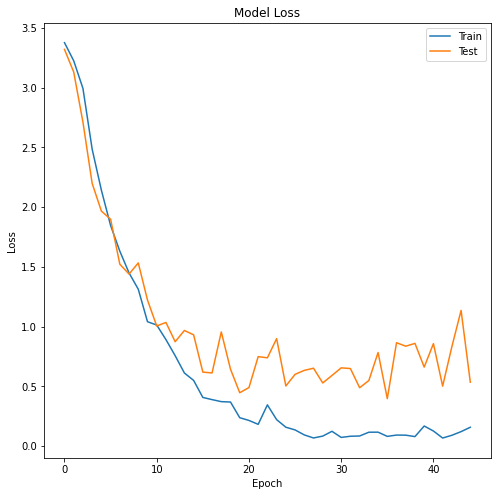

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [ ]:
loss, acc = model.evaluate(test_generator)

print('Loss:', loss)
print('Accuracy:', acc)

9/9 [==============================] - 10s 1s/step - loss: 0.6086 - accuracy: 0.8876
Loss: 0.6085813641548157
Accuracy: 0.8876404762268066


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
  train_generator,
  steps_per_epoch=18,  
  validation_steps=4,
  validation_data=test_generator,
  epochs=5,verbose=1
)

Epoch 1/5
18/18 [==============================] - 29s 2s/step - loss: 0.0706 - accuracy: 0.9874 - val_loss: 0.3246 - val_accuracy: 0.9219
Epoch 2/5
18/18 [==============================] - 32s 2s/step - loss: 0.0945 - accuracy: 0.9677 - val_loss: 1.0499 - val_accuracy: 0.8594
Epoch 3/5
18/18 [==============================] - 27s 2s/step - loss: 0.1198 - accuracy: 0.9677 - val_loss: 0.4699 - val_accuracy: 0.9219
Epoch 4/5
18/18 [==============================] - 27s 2s/step - loss: 0.0497 - accuracy: 0.9803 - val_loss: 0.5563 - val_accuracy: 0.8984
Epoch 5/5
18/18 [==============================] - 27s 2s/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.5214 - val_accuracy: 0.8594


In [ ]:
model.save("fruitcnn.h5")

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

In [ ]:
model=load_model("/content/fruitcnn.h5")

In [ ]:
fruit1 = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/RD data/Test/cherries/13.jpg",target_size=(100,100))


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image as img

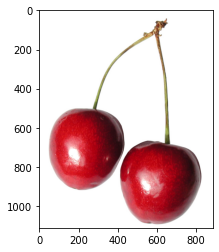

In [ ]:
image=img.imread("/content/drive/MyDrive/RD data/Test/cherries/13.jpg")
plt.imshow(image)

In [ ]:
x = tf.keras.preprocessing.image.img_to_array(fruit1)

In [ ]:
print(x.shape)

(100, 100, 3)


In [ ]:
x=np.expand_dims(x, axis=0)

In [ ]:
print(x.shape)

(1, 100, 100, 3)


In [ ]:
y=model.predict(x)


1/1 [==============================] - 0s 24ms/step


In [ ]:
pred= np.argmax(y, axis=1)
print(y)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [ ]:
index=['acerolas', 'apples', 'apricots', 'avocados', 'bananas', 'blackberries', 'blueberries', 'cantaloupes', 'cherries', 'coconuts', 'figs', 'grapefruits', 'grapes', 'guava', 'kiwifruit', 'lemons', 'limes', 'mangos', 'olives', 'oranges', 'passionfruit', 'peaches', 'pears', 'pineapples', 'plums', 'pomegranates', 'raspberries', 'strawberries', 'watermelons']
result=str(index[pred[0]])
print(result)

cherries
